# Initial Data Exploration

In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%run ../src/utils.py

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To get an initial glimpse at dimensionality and formats throughout our train set, let's firstly look at its `shape` and the first few records inside.

In [2]:
train = pd.read_csv('../data/raw/data_train.zip', index_col='Unnamed: 0')
train.shape

(814262, 11)

In [3]:
train.tail(5)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
814257,ffffc6359725f0e1feac9ef1872ab207_11,traj_ffffc6359725f0e1feac9ef1872ab207_11_4,02:21:11,02:21:11,NaN,NaN,NaN,3.744666e+06,-1.925679e+07,3.744666e+06,-1.925679e+07
814258,ffffc6359725f0e1feac9ef1872ab207_11,traj_ffffc6359725f0e1feac9ef1872ab207_11_5,06:02:17,06:02:17,NaN,NaN,NaN,3.744732e+06,-1.925614e+07,3.744732e+06,-1.925614e+07
814259,ffffc6359725f0e1feac9ef1872ab207_11,traj_ffffc6359725f0e1feac9ef1872ab207_11_7,09:52:13,09:52:13,NaN,NaN,NaN,3.744666e+06,-1.925679e+07,3.744666e+06,-1.925679e+07
814260,ffffc6359725f0e1feac9ef1872ab207_11,traj_ffffc6359725f0e1feac9ef1872ab207_11_8,14:20:26,14:27:15,NaN,NaN,NaN,3.741043e+06,-1.929051e+07,3.741057e+06,-1.928936e+07
814261,ffffc6359725f0e1feac9ef1872ab207_11,traj_ffffc6359725f0e1feac9ef1872ab207_11_10,14:56:46,15:04:05,0.0,0.0,0.0,3.743948e+06,-1.923560e+07,3.744842e+06,-1.926218e+07


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814262 entries, 0 to 814261
Data columns (total 11 columns):
hash             814262 non-null object
trajectory_id    814262 non-null object
time_entry       814262 non-null object
time_exit        814262 non-null object
vmax             256769 non-null float64
vmin             256769 non-null float64
vmean            270778 non-null float64
x_entry          814262 non-null float64
y_entry          814262 non-null float64
x_exit           814262 non-null float64
y_exit           814262 non-null float64
dtypes: float64(7), object(4)
memory usage: 74.5+ MB


We can already identify a couple of trajectories, time marks and positioning - yet it wouldn't be possible to conclude much. Glancing the `.head` of a dataset can only bring a general idea of data format.

In order to trace a broader analysis of `train.csv`'s content, we will be using the `pandas_profiling` lib, which can give us a full report on missing value percentage per column, correlation scores and other metrics.

In [217]:
import pandas_profiling

pandas_profiling.ProfileReport(train)

Number of variables,11
Number of observations,814262
Total Missing (%),6.2%
Total size in memory,74.5 MiB
Average record size in memory,96.0 B
Numeric,4
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,3


Let's begin by visualizating a simple path taken from one ID in one day, to get a more focused view into the dataset's scenario.

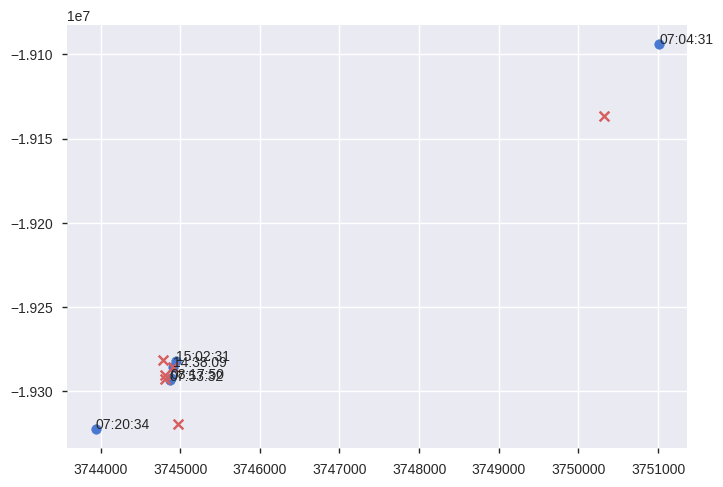

In [218]:
sample = train[train.hash=='0000a8602cf2def930488dee7cdad104_1']

plt.scatter(sample.x_entry, sample.y_entry, c='b' , marker='o')
plt.scatter(sample.x_exit, sample.y_exit, c='r', marker='x')

n = sample.time_entry

for i, txt in enumerate(n):
    plt.annotate(txt, (sample.x_entry[i], sample.y_entry[i]))

We can calculate some feature to help our task of visualization, since we have just a few data of information to help on this task.

In [219]:
train.head(10)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07
5,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,3.744785e+06,-1.928148e+07
6,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_0,14:29:23,14:29:23,0.000000,0.000000,0.000000,3.749450e+06,-1.926506e+07,3.749450e+06,-1.926506e+07
7,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_1,14:39:49,14:39:49,0.000000,0.000000,0.000000,3.749090e+06,-1.926726e+07,3.749090e+06,-1.926726e+07
8,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_2,14:50:14,14:50:14,0.507809,0.507809,0.507809,3.749042e+06,-1.926632e+07,3.749042e+06,-1.926632e+07
9,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,-1.926594e+07


As we can see, we have coordinates for an entry and an exit point, indicating where each trajectory happened. We can then calculate the distance these trajectories took by calculating the euclidian distance between those two points. Let's do that.

In [10]:
train['distance'] = euclidean(train.x_entry.values, train.y_entry.values, 
                                       train.x_exit.values, train.y_entry.values)
train['distance'].head(4)

0     687.954453
1    1037.497654
2      52.320161
3      71.244474
Name: distance, dtype: float64

Let's explore a little bit about this new variable, beginning by grouping it according wit the hash variable, that indicates one-day trajectory.

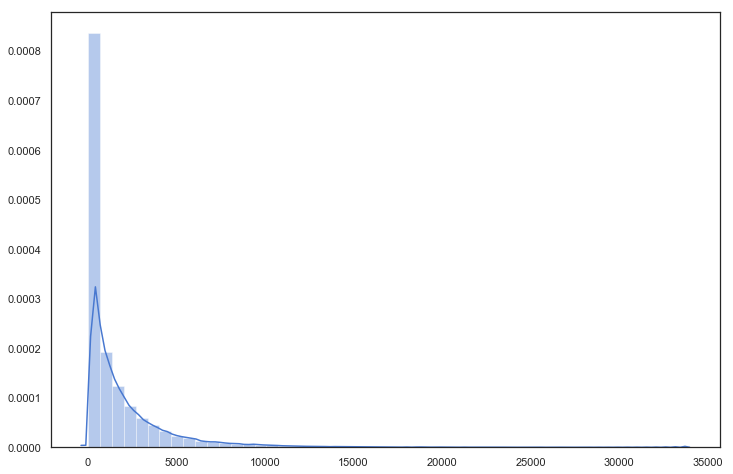

In [14]:
train_grouped = train.groupby('hash').distance

fig = plt.figure(figsize=(12, 8))
sns.set(style="white", palette="muted", color_codes=True)

sns.distplot(train_grouped.mean().dropna().values)

In [15]:
print('Skewness: {}'.format(train_grouped.mean().skew()))
print('Kurtosis: {}'.format(train_grouped.mean().kurtosis()))

Skewness: 3.475639444181356
Kurtosis: 18.12415935312715


As we can see, on average the distance traveled is a little skewed towards the right tail.

We also can explore distance in the time domain, I want to investigate in which time of the day the trajectories has longest distances.

Minimum value for time_entry: 0 days 00:00:00
Maximum value for time_entry: 0 days 16:00:00
Minimum value for time_exit: 0 days 00:00:00
Maximum value for time_exit: 0 days 16:00:00


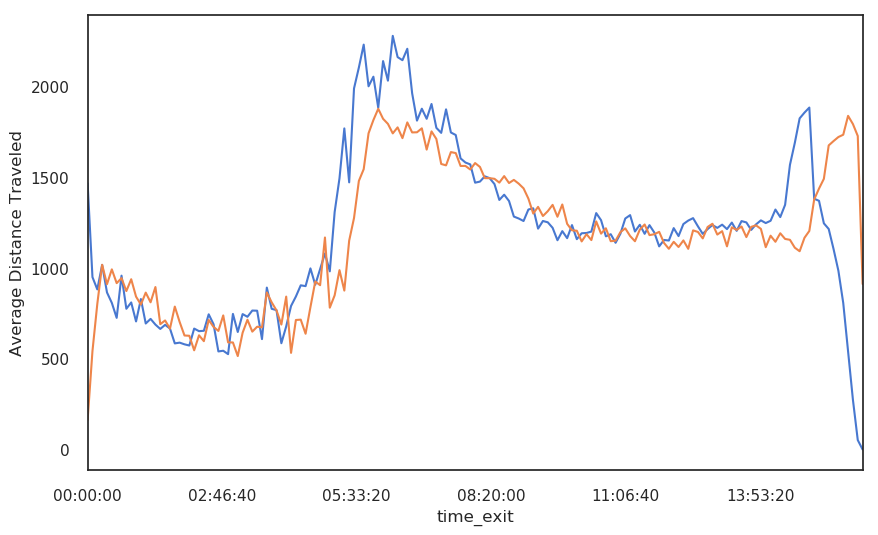

In [223]:
# transforming time variable to timedelta format in pandas

train['time_entry'] = pd.to_timedelta(train.time_entry)
train['time_exit'] = pd.to_timedelta(train.time_exit)

print('Minimum value for time_entry: {}'.format(train.time_entry.min()))
print('Maximum value for time_entry: {}'.format(train.time_entry.max()))

print('Minimum value for time_exit: {}'.format(train.time_entry.min()))
print('Maximum value for time_exit: {}'.format(train.time_entry.max()))

entry_avg = train.set_index('time_entry').distance.resample('0.1H').mean()
exit_avg = train.set_index('time_exit').distance.resample('0.1H').mean()


ax = plt.subplot(2, 1, 1)
ax.set_ylabel('Average Distance Traveled')
ax.set_xlabel('Time')

entry_avg.plot(ax=ax, figsize=(10, 13))
exit_avg.plot(ax=ax, figsize=(10, 13))

The plot above shows the average distance traveled during the day for entry_time and exit_time. As expected, they are correlated and shifted because they represent the same value for exactly the same time.

An interesting point here is how we have two peaks: one approximately during 6 AM and another after lunch time, let's here the exact times.

In [224]:
exit_avg.sort_values(ascending=False).head(10)

time_exit
06:00:00    1874.967491
15:42:00    1836.088640
06:06:00    1819.739852
05:54:00    1812.863273
06:36:00    1800.010859
06:12:00    1791.906368
15:48:00    1790.920920
06:24:00    1772.589136
06:54:00    1767.436456
07:06:00    1750.546901
Name: distance, dtype: float64

It is clear now that during the morning the distance traveled are higher than in other time during day, probably due people going to work. The same is happening for people who is starting leave, let's say **15:42-15:48**.

**INSIGHT:** We could check this online looking for statistics about atlanta's city to see if our assumptions matches. Also, in order to predict who is going to leave the city during 15:00 - 16:00 we can create a variable indicaing if the person took a trajectory from out to inside the city at time during **06:00-07:00** AM. Let's explore in the following.

To continue our investigation, let's create a variable to see if a person is inside or not the city for its entry point and its exit point.

In [225]:
def is_inside_city(x, y):
    if (3750901.5068 <= x <= 3770901.5068) and (-19268905.6133 <= y <= -19208905.6133):
        return 1
    else:
        return 0

train['is_inside_city_entry'] = [is_inside_city(x, y) for x, y in zip(train.x_entry, train.y_entry)]
train['is_inside_city_exit'] = [is_inside_city(x, y) for x, y in zip(train.x_exit, train.y_exit)]

Again, let's explore this variable temporally.

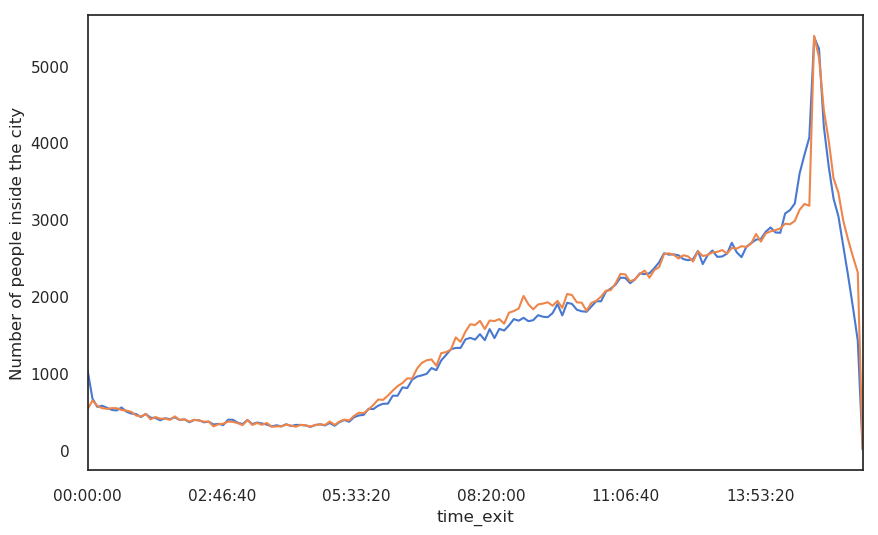

In [226]:
entry_avg_inside = train.set_index('time_entry').resample('0.1H').is_inside_city_entry.sum()
exit_avg_inside = train.set_index('time_exit').resample('0.1H').is_inside_city_exit.sum()


ax = plt.subplot(2, 1, 1)
ax.set_ylabel('Number of people inside the city')
ax.set_xlabel('Time')

entry_avg_inside.plot(ax=ax, figsize=(10, 13))
exit_avg_inside.plot(ax=ax, figsize=(10, 13))

So, as the day passes, people are getting more inside the city, let's check all the ones who left between 06:00-07:00 if the exit point was inside city.

In [227]:
exit_avg_inside.sort_values(ascending=False).head(10)

time_exit
15:00:00    5389
15:06:00    5105
15:12:00    4421
15:18:00    4027
15:24:00    3534
15:30:00    3347
14:48:00    3202
14:54:00    3178
14:42:00    3126
15:36:00    2984
Name: is_inside_city_exit, dtype: int64

In [228]:
entry_avg_inside.sort_values(ascending=False).head(10)

time_entry
15:00:00    5370
15:06:00    5221
15:12:00    4205
14:54:00    4067
14:48:00    3842
15:18:00    3689
14:42:00    3601
15:24:00    3270
14:36:00    3207
14:30:00    3121
Name: is_inside_city_entry, dtype: int64

Let's explore how the variables are distributed for people leaving and entering the city.

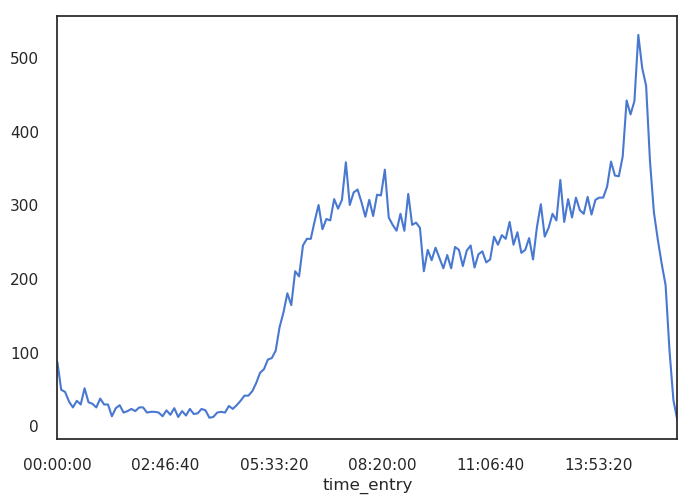

In [229]:
entering = train[(train.is_inside_city_entry==0) & (train.is_inside_city_exit==1)]

entering.set_index('time_entry').resample('0.1H').count().hash.plot()

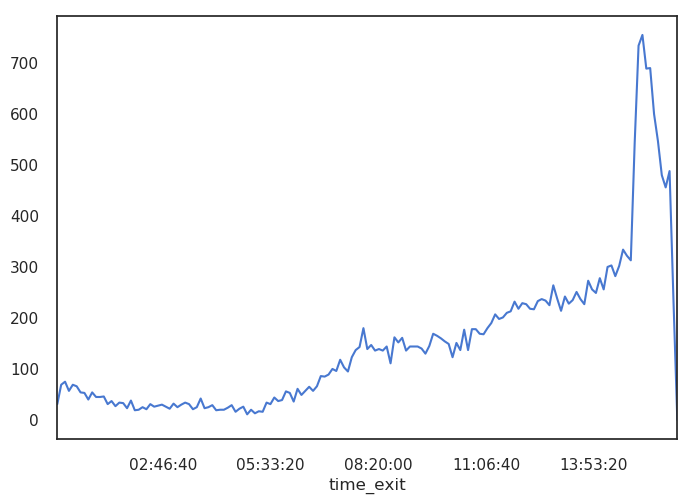

In [230]:
leaving = train[(train.is_inside_city_entry==1) & (train.is_inside_city_exit==0)]

leaving.set_index('time_exit').resample('0.1H').count().hash.plot()

In [231]:
six_am = pd.to_timedelta('06:00:00')
seven_am = pd.to_timedelta('07:00:00')

train[(train.time_entry >= six_am) & (train.time_entry <= seven_am)
     & (train.is_inside_city_entry==0) & (train.is_inside_city_exit==1)].head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,distance,is_inside_city_entry,is_inside_city_exit
131,001347748b8caf13e837cff3e969c15d_15,traj_001347748b8caf13e837cff3e969c15d_15_1,06:55:04,07:17:49,NaN,NaN,NaN,3.757704e+06,-1.928421e+07,3.757788e+06,-1.923512e+07,83.489618,0,1
367,0024452fea3e42f9ca0dcf6dd3ff3336_19,traj_0024452fea3e42f9ca0dcf6dd3ff3336_19_4,06:56:53,07:11:53,0.000000,0.000000,0.000000,3.771933e+06,-1.922423e+07,3.766987e+06,-1.922847e+07,4945.924976,0,1
414,0029d917352b7668953513cfc3b4478f_19,traj_0029d917352b7668953513cfc3b4478f_19_2,06:41:03,07:15:29,4.790038,4.790038,4.790038,3.757789e+06,-1.914088e+07,3.767774e+06,-1.923552e+07,9985.358324,0,1
714,004133eb5cc1834d063c72f93de9b136_1,traj_004133eb5cc1834d063c72f93de9b136_1_0,06:29:59,06:52:30,17.850000,17.850000,17.850000,3.742407e+06,-1.924645e+07,3.756150e+06,-1.924978e+07,13743.504333,0,1
1326,006e177f08c0d197c904d18c96305a24_31,traj_006e177f08c0d197c904d18c96305a24_31_6,06:32:02,06:51:53,NaN,NaN,NaN,3.758184e+06,-1.916095e+07,3.757353e+06,-1.924205e+07,830.443401,0,1


We can also calculate the trajectory mean time using time_exit - time_entry variables.

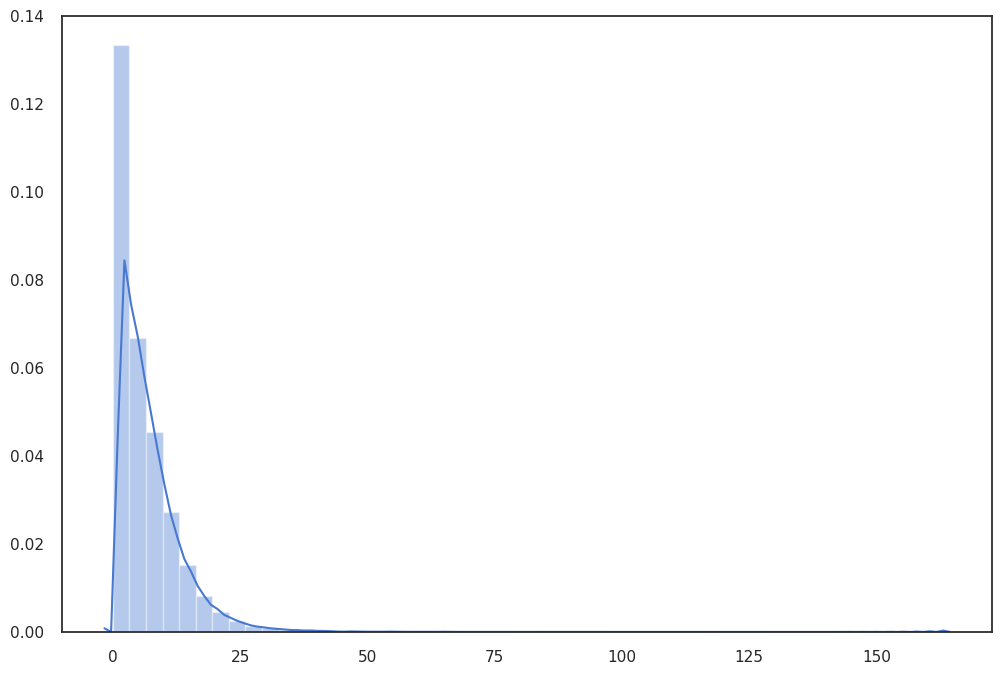

In [232]:
train['trajectory_time'] = (train.time_exit - train.time_entry) / np.timedelta64(1, 'm')

train_grouped = train.groupby('hash').trajectory_time

fig = plt.figure(figsize=(12, 8))
sns.set(style="white", palette="muted", color_codes=True)

sns.distplot(train_grouped.mean().values)

Also, we can plot the distribution of number of trajectores taken for each device has id.

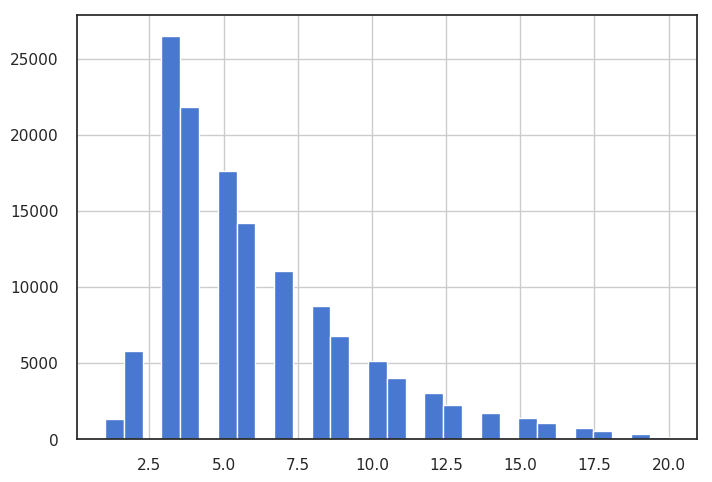

In [233]:
train.groupby('hash').trajectory_id.count().hist(bins=30)

Again, we have an approximately normal distribution.

## Simple Feature Extraction

In [234]:
distance_timetrajectory_features = (train
                                    .groupby(['hash', 'trajectory_id', 'time_entry'])[['distance', 'trajectory_time']]
                                    .mean()
                                    .shift(1)
                                    .rolling(5, min_periods=1)
                                    .agg(['mean', 'max', 'std', 'min', 'sum']))
distance_timetrajectory_features.head(5)

distance  \
                                                                                               mean   
hash                               trajectory_id                             time_entry               
0000a8602cf2def930488dee7cdad104_1 traj_0000a8602cf2def930488dee7cdad104_1_0 07:04:31           NaN   
                                   traj_0000a8602cf2def930488dee7cdad104_1_1 07:20:34    687.954453   
                                   traj_0000a8602cf2def930488dee7cdad104_1_2 07:53:32    862.726054   
                                   traj_0000a8602cf2def930488dee7cdad104_1_3 08:17:50    592.590756   
                                   traj_0000a8602cf2def930488dee7cdad104_1_4 14:38:09    462.254186   

                                                                                                      \
                                                                                                 max   
hash                               trajectory_id                             time_entry                
0000a8602cf2def930488dee7cdad104_1 traj_0000a8602cf2def930488dee7cdad104_1_0 07:04:31            NaN   
                                   traj_0000a8602cf2def930488dee7cdad104_1_1 07:20:34     687.954453   
                                   traj_0000a8602cf2def930488dee7cdad104_1_2 07:53:32    1037.497654   
                                   traj_0000a8602cf2def930488dee7cdad104_1_3 08:17:50    1037.497654   
                                   traj_0000a8602cf2def930488dee7cdad104_1_4 14:38:09    1037.497654   

                                                                                                     \
                                                                                                std   
hash                               trajectory_id                             time_entry               
0000a8602cf2def930488dee7cdad104_1 traj_0000a8602cf2def930488dee7cdad104_1_0 07:04:31           NaN   
                                   traj_0000a8602cf2def930488dee7cdad104_1_1 07:20:34           NaN   
                                   traj_0000a8602cf2def930488dee7cdad104_1_2 07:53:32    247.164368   
                                   traj_0000a8602cf2def930488dee7cdad104_1_3 08:17:50    499.464062   
                                   traj_0000a8602cf2def930488dee7cdad104_1_4 14:38:09    484.004187   

                                                                                                     \
                                                                                                min   
hash                               trajectory_id                             time_entry               
0000a8602cf2def930488dee7cdad104_1 traj_0000a8602cf2def930488dee7cdad104_1_0 07:04:31           NaN   
                                   traj_0000a8602cf2def930488dee7cdad104_1_1 07:20:34    687.954453   
                                   traj_0000a8602cf2def930488dee7cdad104_1_2 07:53:32    687.954453   
                                   traj_0000a8602cf2def930488dee7cdad104_1_3 08:17:50     52.320161   
                                   traj_0000a8602cf2def930488dee7cdad104_1_4 14:38:09     52.320161   

                                                                                                      \
                                                                                                 sum   
hash                               trajectory_id                             time_entry                
0000a8602cf2def930488dee7cdad104_1 traj_0000a8602cf2def930488dee7cdad104_1_0 07:04:31            NaN   
                                   traj_0000a8602cf2def930488dee7cdad104_1_1 07:20:34     687.954453   
                                   traj_0000a8602cf2def930488dee7cdad104_1_2 07:53:32    1725.452107   
                                   traj_0000a8602cf2def930488dee7cdad104_1_3 08:17:50    1777.772268   
                                   traj_0000a8602cf2def

In [235]:
distance_timetrajectory_features.columns = ["_".join(x) 
                                            for x in distance_timetrajectory_features.columns.ravel()]

In [236]:
train = train.merge(distance_timetrajectory_features.reset_index(), 
                    on=['hash', 'trajectory_id', 'time_entry'])
train.head(4)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,...,distance_mean,distance_max,distance_std,distance_min,distance_sum,trajectory_time_mean,trajectory_time_max,trajectory_time_std,trajectory_time_min,trajectory_time_sum
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,...,687.954453,687.954453,NaN,687.954453,687.954453,4.016667,4.016667,NaN,4.016667,4.016667
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,...,862.726054,1037.497654,247.164368,687.954453,1725.452107,4.575000,5.133333,0.789603,4.016667,9.150000
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,...,592.590756,1037.497654,499.464062,52.320161,1777.772268,6.344444,9.883333,3.115211,4.016667,19.033333


Thus, we can infer a vmean for missing values. Also, we can compare with the ones not missing.

In [238]:
x_center = 3750901.5068 + ((3770901.5068-3750901.5068)/2)
y_center = -19268905.6133 + ((-19208905.6133+19268905.6133)/2)

In [239]:
train['time_entry'] = pd.to_timedelta(train.time_entry)
train['time_exit'] = pd.to_timedelta(train.time_exit)

In [241]:
train['timedelta_in_minutes'] = (train.time_exit - train.time_entry) / np.timedelta64(1, 'm')

In [242]:
train['distance_from_center'] = np.sqrt(((train.x_entry.values-x_center)**2) + ((train.y_entry.values-y_center)**2))

In [243]:
train.head(4)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,...,distance_min,distance_sum,trajectory_time_mean,trajectory_time_max,trajectory_time_std,trajectory_time_min,trajectory_time_sum,last_distance,timedelta_in_minutes,distance_from_center
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.016667,145261.881023
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,...,687.954453,687.954453,4.016667,4.016667,NaN,4.016667,4.016667,687.954453,5.133333,85266.551966
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,...,687.954453,1725.452107,4.575000,5.133333,0.789603,4.016667,9.150000,1037.497654,9.883333,56962.437581
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,...,52.320161,1777.772268,6.344444,9.883333,3.115211,4.016667,19.033333,52.320161,19.550000,55736.470981


In [244]:
three_oclock = pd.to_timedelta('15:00:00')
four_oclock = pd.to_timedelta('16:00:00')

data_train = train[(train.time_exit >= three_oclock) & (train.time_exit <= four_oclock)].copy()

In [245]:
test = pd.read_csv('../data/raw/data_test.zip', index_col='Unnamed: 0')
test.shape

(202937, 11)

In [246]:
data_train.head(5)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,...,distance_min,distance_sum,trajectory_time_mean,trajectory_time_max,trajectory_time_std,trajectory_time_min,trajectory_time_sum,last_distance,timedelta_in_minutes,distance_from_center
5,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_5,15:02:31,15:18:33,NaN,NaN,NaN,3.744945e+06,-1.928183e+07,3.744785e+06,...,0.0,1849.016742,7.716667,19.550000,7.493877,0.0,38.583333,0.000000,16.033333,45797.982227
9,0000cf177130469eeac79f67b6bcf3df_9,traj_0000cf177130469eeac79f67b6bcf3df_9_3,15:00:32,15:29:48,1.149404,1.149404,1.149404,3.749088e+06,-1.926605e+07,3.749610e+06,...,0.0,159.186872,3.206667,16.033333,7.170325,0.0,16.033333,0.000000,29.266667,29603.985176
11,0001f97b99a80f18f62e2d44e54ef33d_3,traj_0001f97b99a80f18f62e2d44e54ef33d_3_1,14:34:35,15:19:51,30.167742,30.167742,30.167742,3.758738e+06,-1.937594e+07,3.769687e+06,...,0.0,14979.150681,8.860000,29.266667,13.134315,0.0,44.300000,14457.062269,45.266667,137051.659155
20,0002124248b0ca510dea42824723ccac_31,traj_0002124248b0ca510dea42824723ccac_31_10,15:28:54,15:28:54,NaN,NaN,NaN,3.767866e+06,-1.917797e+07,3.767866e+06,...,0.0,25927.422601,17.913333,45.266667,19.539527,0.0,89.566667,8344.509030,0.000000,61336.955341
28,000219c2a6380c307e8bffd85b5e404b_23,traj_000219c2a6380c307e8bffd85b5e404b_23_16,15:08:05,15:08:05,NaN,NaN,NaN,3.747641e+06,-1.922695e+07,3.747641e+06,...,0.0,25061.356962,10.866667,30.816667,13.656912,0.0,54.333333,16166.929648,0.000000,17851.785279


In [247]:
data_train.columns

Index(['hash', 'trajectory_id', 'time_entry', 'time_exit', 'vmax', 'vmin',
       'vmean', 'x_entry', 'y_entry', 'x_exit', 'y_exit', 'distance',
       'is_inside_city_entry', 'is_inside_city_exit', 'trajectory_time',
       'distance_mean', 'distance_max', 'distance_std', 'distance_min',
       'distance_sum', 'trajectory_time_mean', 'trajectory_time_max',
       'trajectory_time_std', 'trajectory_time_min', 'trajectory_time_sum',
       'last_distance', 'timedelta_in_minutes', 'distance_from_center'],
      dtype='object')

In [271]:
data_train = data_train.fillna(value=0)

features = ['vmax', 'vmin', 'vmean', 'x_entry', 'y_entry', 'is_inside_city_entry', 
            'distance_from_center', 'distance_mean', 'distance_max', 'distance_std', 
            'distance_min','distance_sum', 'trajectory_time_mean', 'trajectory_time_max',
            'trajectory_time_std', 'trajectory_time_min', 'trajectory_time_sum',
           'last_distance', 'timedelta_in_minutes']

target = ['is_inside_city_exit']

/home/victor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [272]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from lightgbm import LGBMClassifier

dt_train, dt_test = train_test_split(data_train, test_size=0.20, random_state=20)
dt_train.shape, dt_test.shape

((107250, 28), (26813, 28))

In [273]:
#dt_train[target].is_inside_city_exit.value_counts(normalize=True)

In [274]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(LGBMClassifier(n_estimators=150))
pipeline.fit(dt_train[features], dt_train[target])

/home/victor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/victor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('lgbmclassifier', LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0))])

In [275]:
from sklearn.metrics import f1_score, r2_score

preds = pipeline.predict(dt_test[features])

f1_score(dt_test[target], preds)

0.8755438271164682

In [277]:
test['time_entry'] = pd.to_timedelta(test.time_entry)
test['time_exit'] = pd.to_timedelta(test.time_exit)
test['is_inside_city_entry'] = [is_inside_city(x, y) for x, y in zip(test.x_entry, test.y_entry)]
test['distance'] = euclidian_distance(test.x_entry.values, test.y_entry.values, 
                                       test.x_exit.values, test.y_entry.values)

test['timedelta_in_minutes'] = (test.time_exit - test.time_entry) / np.timedelta64(1, 'm')
test['last_timedelta_in_minutes'] = test['timedelta_in_minutes'].shift(1)
test['last_distance'] = test.distance.shift(1)
test['distance_from_center'] = np.sqrt(((test.x_entry.values-x_center)**2) + ((test.y_entry.values-y_center)**2))

test['trajectory_time'] = (test.time_exit - test.time_entry) / np.timedelta64(1, 'm')

In [278]:
distance_timetrajectory_features = (test
                                    .groupby(['hash', 'trajectory_id', 'time_entry'])[['distance', 'trajectory_time']]
                                    .mean()
                                    .shift(1)
                                    .rolling(5, min_periods=1)
                                    .agg(['mean', 'max', 'std', 'min', 'sum']))
distance_timetrajectory_features.head(5)

distance  \
                                                                                                  mean   
hash                                trajectory_id                              time_entry                
00032f51796fd5437b238e3a9823d13d_31 traj_00032f51796fd5437b238e3a9823d13d_31_0 11:43:17            NaN   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_2 12:21:37     302.789015   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_3 12:34:27     151.394507   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_4 13:25:33    2766.660411   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_5 15:03:32    2138.447418   

                                                                                                        \
                                                                                                   max   
hash                                trajectory_id                              time_entry                
00032f51796fd5437b238e3a9823d13d_31 traj_00032f51796fd5437b238e3a9823d13d_31_0 11:43:17            NaN   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_2 12:21:37     302.789015   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_3 12:34:27     302.789015   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_4 13:25:33    7997.192219   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_5 15:03:32    7997.192219   

                                                                                                        \
                                                                                                   std   
hash                                trajectory_id                              time_entry                
00032f51796fd5437b238e3a9823d13d_31 traj_00032f51796fd5437b238e3a9823d13d_31_0 11:43:17            NaN   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_2 12:21:37            NaN   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_3 12:34:27     214.104166   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_4 13:25:33    4532.302675   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_5 15:03:32    3908.083667   

                                                                                                       \
                                                                                                  min   
hash                                trajectory_id                              time_entry               
00032f51796fd5437b238e3a9823d13d_31 traj_00032f51796fd5437b238e3a9823d13d_31_0 11:43:17           NaN   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_2 12:21:37    302.789015   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_3 12:34:27      0.000000   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_4 13:25:33      0.000000   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_5 15:03:32      0.000000   

                                                                                                        \
                                                                                                   sum   
hash                                trajectory_id                              time_entry                
00032f51796fd5437b238e3a9823d13d_31 traj_00032f51796fd5437b238e3a9823d13d_31_0 11:43:17            NaN   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_2 12:21:37     302.789015   
                                    traj_00032f51796fd5437b238e3a9823d13d_31_3 12:34:27     302.789015   
                                    traj_00032f51796fd5437b238e3a9823d

In [279]:
distance_timetrajectory_features.columns = ["_".join(x) 
                                            for x in distance_timetrajectory_features.columns.ravel()]

In [280]:
test = test.merge(distance_timetrajectory_features.reset_index(), 
                    on=['hash', 'trajectory_id', 'time_entry'])
test.head(4)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,...,distance_min,distance_sum,trajectory_time_mean,trajectory_time_max,trajectory_time_std,trajectory_time_min,trajectory_time_sum,last_distance,timedelta_in_minutes,distance_from_center
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.016667,145261.881023
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,...,687.954453,687.954453,4.016667,4.016667,NaN,4.016667,4.016667,687.954453,5.133333,85266.551966
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,...,687.954453,1725.452107,4.575000,5.133333,0.789603,4.016667,9.150000,1037.497654,9.883333,56962.437581
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,...,52.320161,1777.772268,6.344444,9.883333,3.115211,4.016667,19.033333,52.320161,19.550000,55736.470981


In [281]:
data_test = test[test.x_exit.isnull()].copy()

In [282]:
data_test = data_test.fillna(value=0.0)

In [286]:
pipeline.fit(data_train[features], data_train[target])

/home/victor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/victor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('lgbmclassifier', LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0))])

In [287]:
preds_oficial = pipeline.predict(data_test[features])

In [288]:
pd.Series(preds_oficial).value_counts()

0    25245
1     8270
dtype: int64

In [289]:
submission = pd.DataFrame(list(zip(data_test.trajectory_id, preds_oficial)), columns=['id', 'target'])

In [290]:
submission.to_csv('../data/submission2.csv', index=False)

In [291]:
list(zip(data_train[features].columns, pipeline.steps[0][1].feature_importances_))

[('vmax', 57),
 ('vmin', 43),
 ('vmean', 69),
 ('x_entry', 771),
 ('y_entry', 421),
 ('is_inside_city_entry', 77),
 ('distance_from_center', 532),
 ('distance_mean', 203),
 ('distance_max', 217),
 ('distance_std', 200),
 ('distance_min', 67),
 ('distance_sum', 0),
 ('trajectory_time_mean', 209),
 ('trajectory_time_max', 210),
 ('trajectory_time_std', 224),
 ('trajectory_time_min', 53),
 ('trajectory_time_sum', 83),
 ('last_distance', 283),
 ('timedelta_in_minutes', 781)]